# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

### Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and parse dates
df = pd.read_csv("exchange_rate.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

In [3]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


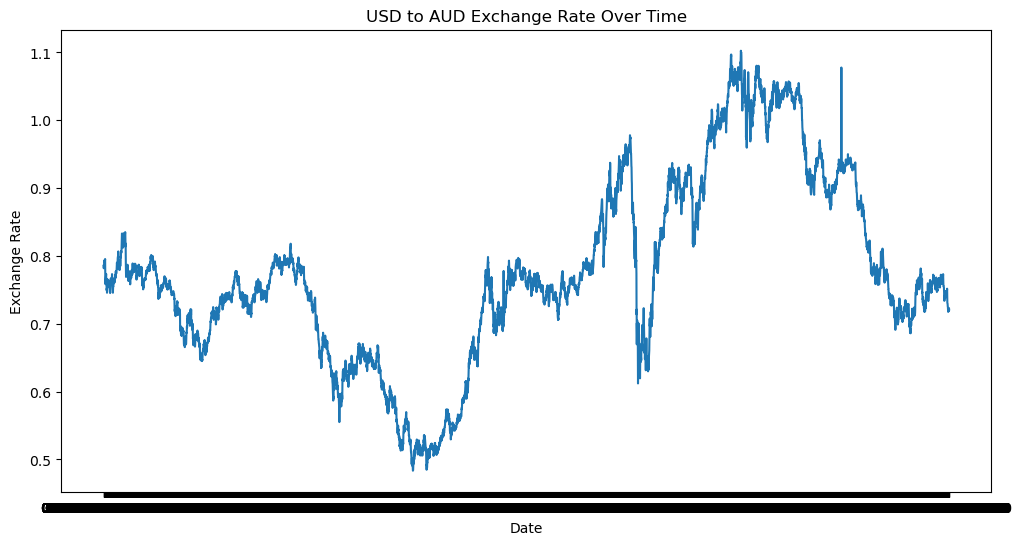

In [4]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'])
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.show()

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Ex_rate    0
dtype: int64


### Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


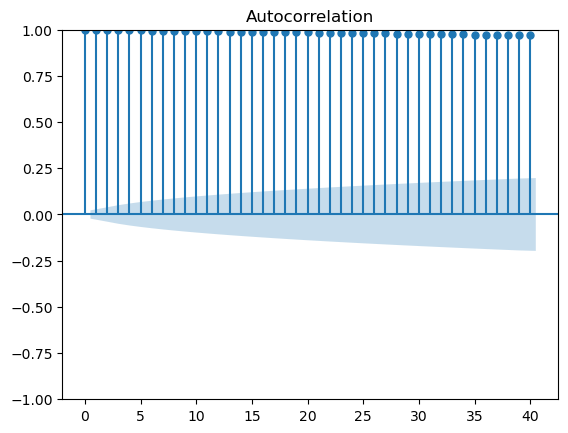

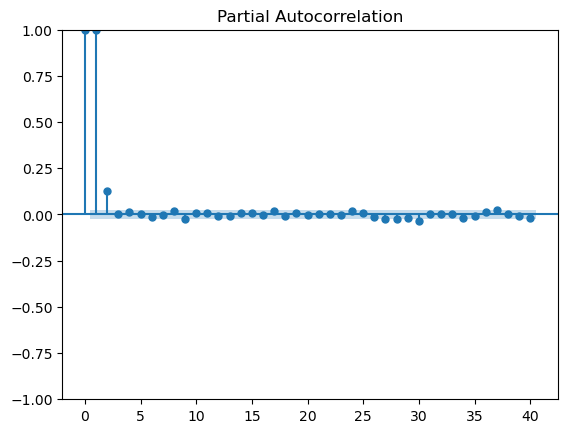

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Display ACF and PACF plots to identify ARIMA parameters
plot_acf(df['Ex_rate'], lags=40)
plot_pacf(df['Ex_rate'], lags=40)
plt.show()


In [7]:
# Split data into train and test (last 200 records for testing)
train = df.iloc[:-200]
test = df.iloc[-200:]


### Forecast with ARIMA

In [8]:
import pandas as pd

# Define the split point
test_size = 300

# Split the data into training and testing sets
train_data = df[:-test_size]
test_data = df[-test_size:]

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")
print("Last 5 rows of training data:")
print(train_data.tail())
print("\nFirst 5 rows of testing data:")
print(test_data.head())

Training data shape: (7288, 1)
Testing data shape: (300, 1)
Last 5 rows of training data:
                   Ex_rate
date                      
10-12-2009 00:00  0.726903
11-12-2009 00:00  0.736160
12-12-2009 00:00  0.742942
13-12-2009 00:00  0.743771
14-12-2009 00:00  0.743771

First 5 rows of testing data:
                   Ex_rate
date                      
15-12-2009 00:00  0.746491
16-12-2009 00:00  0.744158
17-12-2009 00:00  0.752021
18-12-2009 00:00  0.744158
19-12-2009 00:00  0.757662


## Tune and Fit ARIMA Model using Grid Search

In [9]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd # Ensure pandas is imported if not already

# Define the range of p, d, and q values to test
p_values = range(0, 3) # p can range from 0 to 2
d_values = range(0, 2) # d can range from 0 to 1
q_values = range(0, 3) # q can range from 0 to 2

# Initialize variables to store the best AIC and corresponding order
best_aic = float("inf")
best_order = None

# Suppress convergence warnings during grid search
warnings.filterwarnings("ignore")

print("Starting ARIMA Grid Search...")

# Iterate through all combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                # Fit ARIMA model on training data
                model = ARIMA(train_data['Ex_rate'], order=order)
                model_fit = model.fit()
                
                # Get AIC score
                aic = model_fit.aic
                
                # Check if current model has a lower AIC
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
                
                print(f'ARIMA{order} AIC: {aic:.2f}')
            except Exception as e:
                # Handle cases where model fitting fails
                # print(f'ARIMA{order} failed to converge: {e}') # Uncomment for detailed error logging
                continue

print("\nGrid Search Complete.")
print(f'Optimal ARIMA Order: {best_order} with AIC: {best_aic:.2f}')

# Fit the best-performing ARIMA model on the training data
optimal_arima_model = ARIMA(train_data['Ex_rate'], order=best_order)
optimal_arima_model_fit = optimal_arima_model.fit()

# Print the summary of the optimal model
print("\nSummary of the Optimal ARIMA Model:")
print(optimal_arima_model_fit.summary())


Starting ARIMA Grid Search...
ARIMA(0, 0, 0) AIC: -8048.89
ARIMA(0, 0, 1) AIC: -17642.18
ARIMA(0, 0, 2) AIC: -25412.23
ARIMA(0, 1, 0) AIC: -53633.09
ARIMA(0, 1, 1) AIC: -53756.60
ARIMA(0, 1, 2) AIC: -53755.65
ARIMA(1, 0, 0) AIC: -53634.65
ARIMA(1, 0, 1) AIC: -53757.27
ARIMA(1, 0, 2) AIC: -53756.39
ARIMA(1, 1, 0) AIC: -53758.09
ARIMA(1, 1, 1) AIC: -53756.09
ARIMA(1, 1, 2) AIC: -53755.32
ARIMA(2, 0, 0) AIC: -53758.84
ARIMA(2, 0, 1) AIC: -53756.84
ARIMA(2, 0, 2) AIC: -53756.06
ARIMA(2, 1, 0) AIC: -53756.09
ARIMA(2, 1, 1) AIC: -53754.08
ARIMA(2, 1, 2) AIC: -53753.86

Grid Search Complete.
Optimal ARIMA Order: (2, 0, 0) with AIC: -53758.84

Summary of the Optimal ARIMA Model:
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7288
Model:                 ARIMA(2, 0, 0)   Log Likelihood               26883.421
Date:                Wed, 31 Dec 2025   AIC                         -53758.841
Time

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7388
Model:                 ARIMA(1, 1, 1)   Log Likelihood               27259.591
Date:                Wed, 31 Dec 2025   AIC                         -54513.183
Time:                        01:23:39   BIC                         -54492.461
Sample:                             0   HQIC                        -54506.062
                               - 7388                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1244      0.046     -2.710      0.007      -0.214      -0.034
ma.L1         -0.0075      0.046     -0.163      0.870      -0.098       0.083
sigma2       3.65e-05   1.02e-07    356.193      0.0

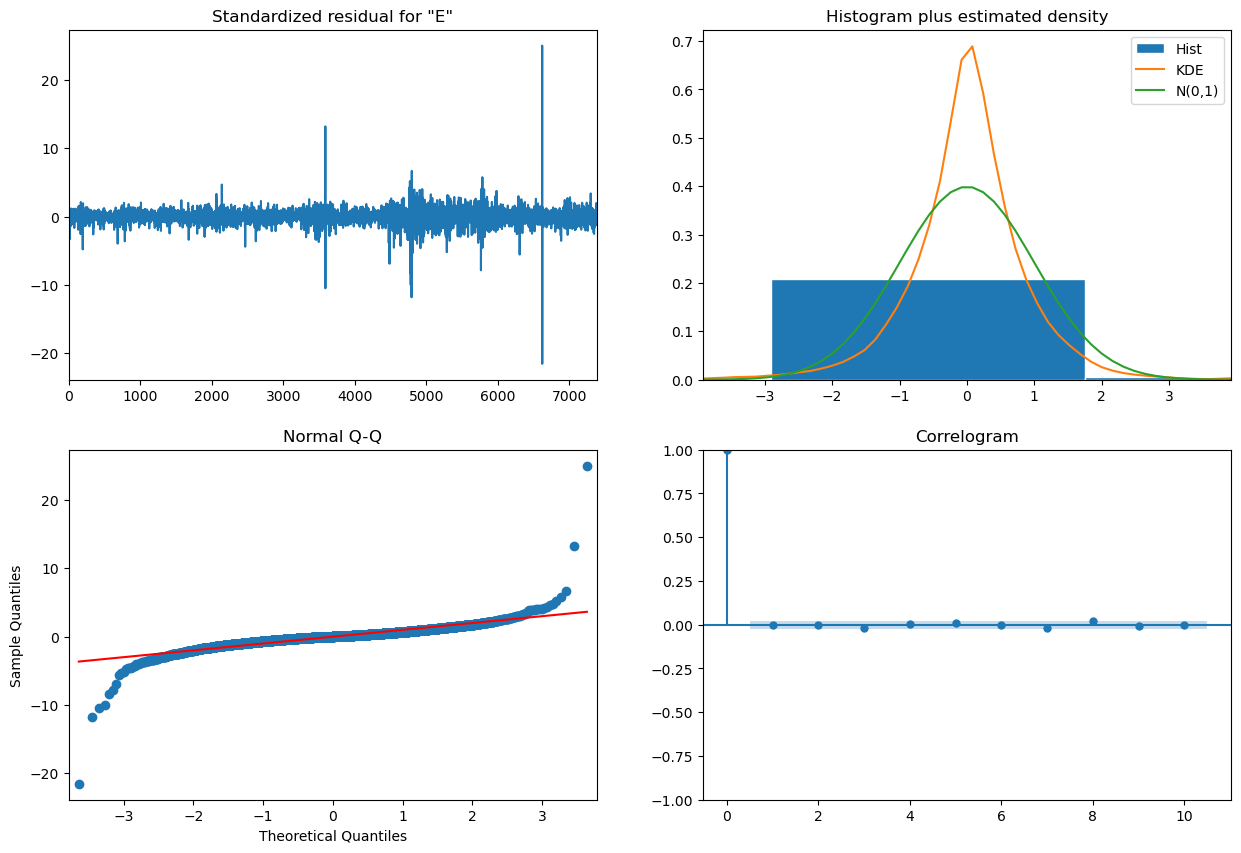

In [10]:
# Fit ARIMA model (example order; tune based on ACF/PACF)
arima_model = sm.tsa.ARIMA(train['Ex_rate'], order=(1,1,1))
arima_fit = arima_model.fit()

print(arima_fit.summary())

# Diagnostic plots
arima_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

## Forecast with ARIMA

In [11]:
start_index = len(train_data)
end_index = len(df) - 1

# Generate out-of-sample forecasts using the optimal ARIMA model
optimal_arima_forecast = optimal_arima_model_fit.predict(start=start_index, end=end_index)

# Print the first few forecast values to verify
print("First 5 optimal ARIMA forecast values:")
print(optimal_arima_forecast.head())

First 5 optimal ARIMA forecast values:
7288    0.743799
7289    0.743824
7290    0.743849
7291    0.743874
7292    0.743899
Name: predicted_mean, dtype: float64


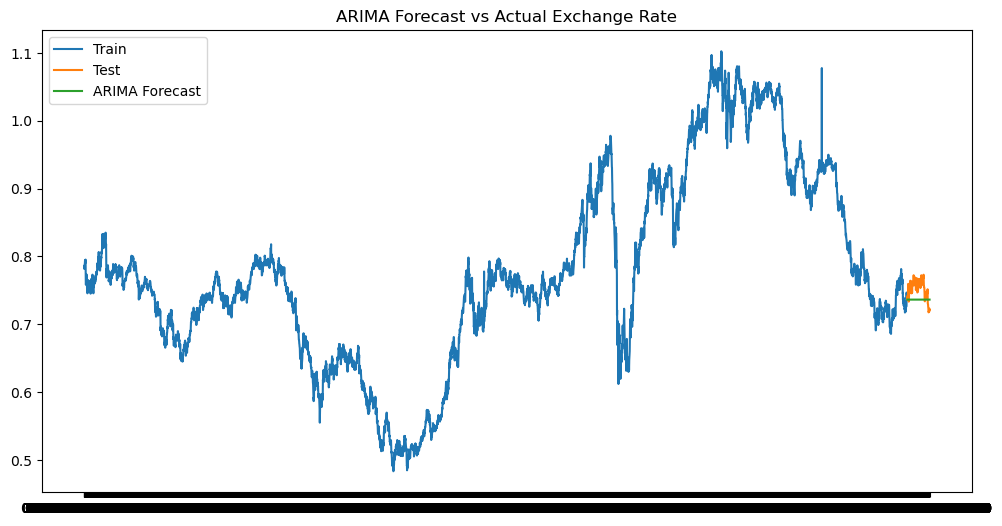

In [12]:
# Forecast on test set
forecast_arima = arima_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Ex_rate'], label='Train')
plt.plot(test.index, test['Ex_rate'], label='Test')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual Exchange Rate")
plt.show()

## Tune and Fit Exponential Smoothing Model using Grid Search

In [13]:
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the range of trend and seasonal values to test
trend_values = [None, 'add', 'mul']
seasonal_values = [None, 'add', 'mul']

# Initialize variables to store the best AIC and corresponding parameters
best_aic_exp = float("inf")
best_exp_params = {'trend': None, 'seasonal': None, 'seasonal_periods': None}

# Suppress convergence warnings during grid search
warnings.filterwarnings("ignore")

print("Starting Exponential Smoothing Grid Search...")

# Iterate through all combinations of trend and seasonal components
for trend in trend_values:
    for seasonal in seasonal_values:
        # Seasonal periods are relevant only if seasonality is present
        seasonal_periods = 7 if seasonal is not None else None # Assuming weekly seasonality for daily data

        try:
            # Instantiate ExponentialSmoothing model
            model = ExponentialSmoothing(
                train_data['Ex_rate'], 
                trend=trend,
                seasonal=seasonal,
                seasonal_periods=seasonal_periods
            )
            # Fit the model
            model_fit = model.fit()

            # Get AIC score
            aic = model_fit.aic

            # Check if current model has a lower AIC
            if aic < best_aic_exp:
                best_aic_exp = aic
                best_exp_params = {'trend': trend, 'seasonal': seasonal, 'seasonal_periods': seasonal_periods}

            print(f'ExpSmoothing(Trend={trend}, Seasonal={seasonal}, Periods={seasonal_periods}) AIC: {aic:.2f}')
        except Exception as e:
            # Handle cases where model fitting fails (e.g., 'mul' with zero/negative values)
            # print(f'ExpSmoothing(Trend={trend}, Seasonal={seasonal}, Periods={seasonal_periods}) failed: {e}') # Uncomment for detailed error logging
            continue

print("\nGrid Search Complete.")
print(f"Optimal Exponential Smoothing Parameters: {best_exp_params} with AIC: {best_aic_exp:.2f}")

# Fit the best-performing Exponential Smoothing model on the training data
optimal_exp_smoothing_model = ExponentialSmoothing(
    train_data['Ex_rate'], 
    trend=best_exp_params['trend'], 
    seasonal=best_exp_params['seasonal'], 
    seasonal_periods=best_exp_params['seasonal_periods']
).fit()

# Print the summary of the optimal model
print("\nSummary of the Optimal Exponential Smoothing Model:")
print(optimal_exp_smoothing_model.summary())


Starting Exponential Smoothing Grid Search...
ExpSmoothing(Trend=None, Seasonal=None, Periods=None) AIC: -74447.45
ExpSmoothing(Trend=None, Seasonal=add, Periods=7) AIC: -74437.38
ExpSmoothing(Trend=None, Seasonal=mul, Periods=7) AIC: -74437.34
ExpSmoothing(Trend=add, Seasonal=None, Periods=None) AIC: -74443.46
ExpSmoothing(Trend=add, Seasonal=add, Periods=7) AIC: -74433.39
ExpSmoothing(Trend=add, Seasonal=mul, Periods=7) AIC: -74433.32
ExpSmoothing(Trend=mul, Seasonal=None, Periods=None) AIC: -74443.59
ExpSmoothing(Trend=mul, Seasonal=add, Periods=7) AIC: -74433.52
ExpSmoothing(Trend=mul, Seasonal=mul, Periods=7) AIC: -74433.48

Grid Search Complete.
Optimal Exponential Smoothing Parameters: {'trend': None, 'seasonal': None, 'seasonal_periods': None} with AIC: -74447.45

Summary of the Optimal Exponential Smoothing Model:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7288
Mod

## Forecast with Exponential Smoothing

In [14]:
num_forecast_steps = len(test_data)

# Generate out-of-sample forecasts using the optimal Exponential Smoothing model
optimal_exp_smoothing_forecast = optimal_exp_smoothing_model.forecast(steps=num_forecast_steps)

# Print the first few forecast values to verify
print("First 5 optimal Exponential Smoothing forecast values:")
print(optimal_exp_smoothing_forecast.head())

First 5 optimal Exponential Smoothing forecast values:
7288    0.743739
7289    0.743739
7290    0.743739
7291    0.743739
7292    0.743739
dtype: float64


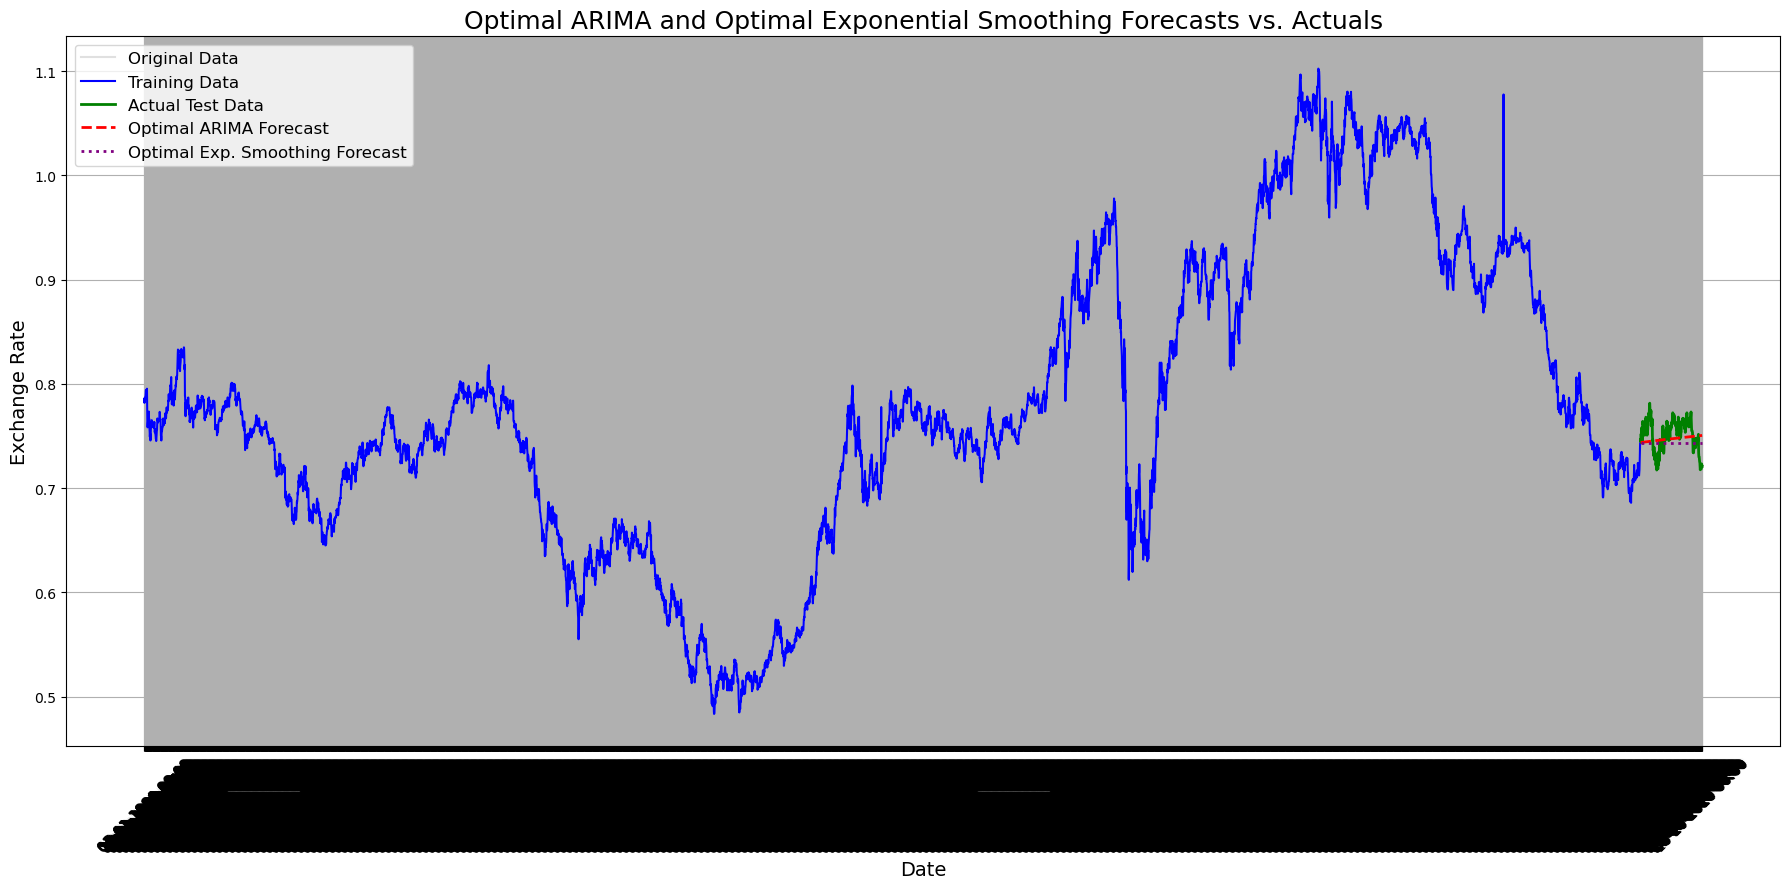

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(18, 9)) # Increased figure size for better readability with multiple lines

# Plot the original data
plt.plot(df.index, df['Ex_rate'], label='Original Data', color='lightgrey', alpha=0.7, linewidth=1.5)

# Plot the training data (a segment of the original data used for training)
plt.plot(train_data.index, train_data['Ex_rate'], label='Training Data', color='blue', linewidth=1.5)

# Plot the actual test data
plt.plot(test_data.index, test_data['Ex_rate'], label='Actual Test Data', color='green', linewidth=2)

# Plot the optimal ARIMA forecasts
plt.plot(optimal_arima_forecast.index, optimal_arima_forecast, label='Optimal ARIMA Forecast', color='red', linestyle='--', linewidth=2)

# Plot the optimal Exponential Smoothing forecasts
plt.plot(optimal_exp_smoothing_forecast.index, optimal_exp_smoothing_forecast, label='Optimal Exp. Smoothing Forecast', color='purple', linestyle=':', linewidth=2)

# Set title and labels
plt.title('Optimal ARIMA and Optimal Exponential Smoothing Forecasts vs. Actuals', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Exchange Rate', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

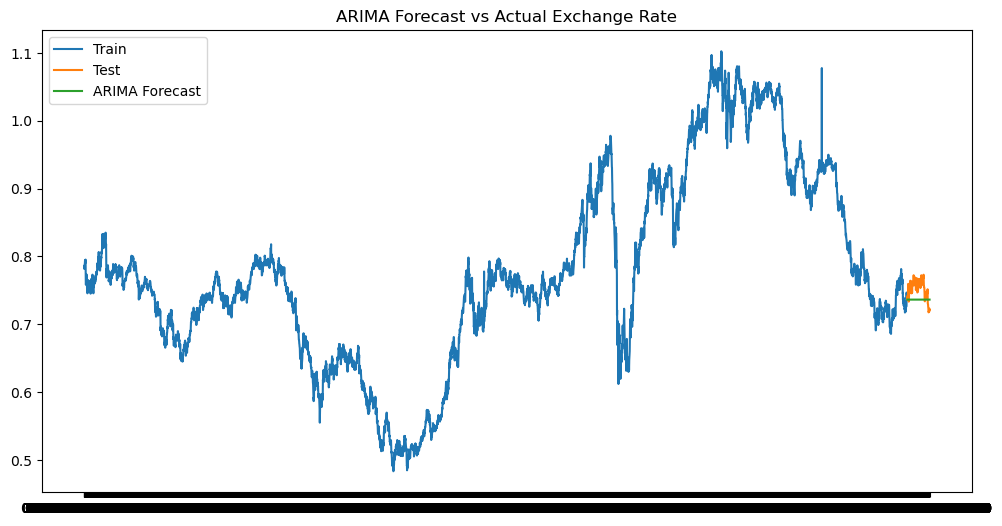

In [16]:
# Forecast on test set
forecast_arima = arima_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Ex_rate'], label='Train')
plt.plot(test.index, test['Ex_rate'], label='Test')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual Exchange Rate")
plt.show()

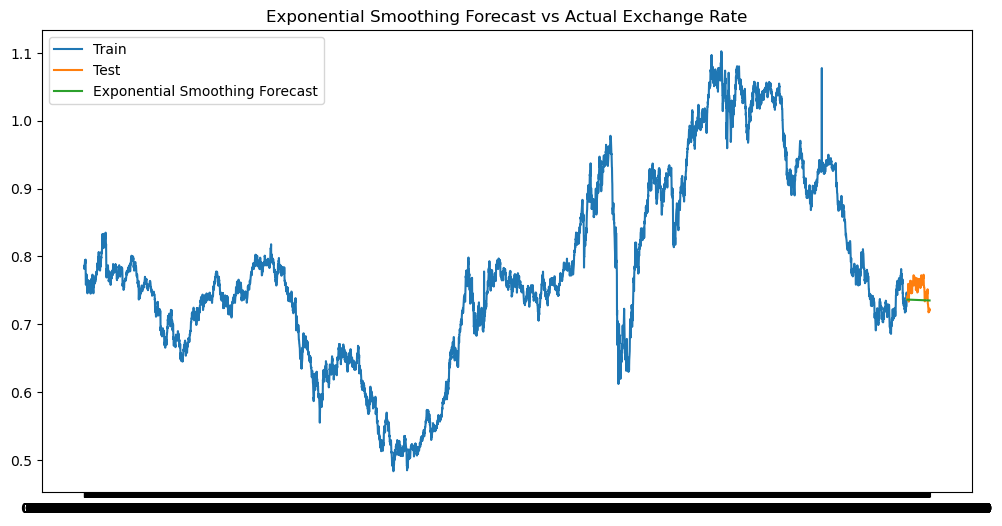

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_smooth_model = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal=None)
exp_smooth_fit = exp_smooth_model.fit()

forecast_exp_smooth = exp_smooth_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Ex_rate'], label='Train')
plt.plot(test.index, test['Ex_rate'], label='Test')
plt.plot(test.index, forecast_exp_smooth, label='Exponential Smoothing Forecast')
plt.legend()
plt.title("Exponential Smoothing Forecast vs Actual Exchange Rate")
plt.show()


### Part 3: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Custom MAPE function since it's not directly in sklearn for percentage
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing 0 with np.nan and then using nanmean
    # or by filtering out zero values from y_true
    non_zero_true = y_true[y_true != 0]
    # If there are no non-zero true values, MAPE is undefined or 0 if all predictions are also 0.
    # For simplicity here, we'll calculate based on non-zero true values.
    if len(non_zero_true) == 0:
        return 0.0 # Or raise an error depending on desired behavior
    
    # Only consider predictions where y_true is not zero to avoid division by zero
    return np.mean(np.abs((y_true[y_true != 0] - y_pred[y_true != 0]) / non_zero_true)) * 100

# --- Optimal ARIMA Model Evaluation ---
print("Optimal ARIMA Model Evaluation:")

# Calculate MAE for Optimal ARIMA
mae_optimal_arima = mean_absolute_error(test_data['Ex_rate'], optimal_arima_forecast)
print(f"  Mean Absolute Error (MAE): {mae_optimal_arima:.4f}")

# Calculate RMSE for Optimal ARIMA
rmse_optimal_arima = np.sqrt(mean_squared_error(test_data['Ex_rate'], optimal_arima_forecast))
print(f"  Root Mean Squared Error (RMSE): {rmse_optimal_arima:.4f}")

# Calculate MAPE for Optimal ARIMA
mape_optimal_arima = mean_absolute_percentage_error(test_data['Ex_rate'], optimal_arima_forecast)
print(f"  Mean Absolute Percentage Error (MAPE): {mape_optimal_arima:.4f}%")

print("\n--- Optimal Exponential Smoothing Model Evaluation ---")

# Calculate MAE for Optimal Exponential Smoothing
mae_optimal_exp_smoothing = mean_absolute_error(test_data['Ex_rate'], optimal_exp_smoothing_forecast)
print(f"  Mean Absolute Error (MAE): {mae_optimal_exp_smoothing:.4f}")

# Calculate RMSE for Optimal Exponential Smoothing
rmse_optimal_exp_smoothing = np.sqrt(mean_squared_error(test_data['Ex_rate'], optimal_exp_smoothing_forecast))
print(f"  Root Mean Squared Error (RMSE): {rmse_optimal_exp_smoothing:.4f}")

# Calculate MAPE for Optimal Exponential Smoothing
mape_optimal_exp_smoothing = mean_absolute_percentage_error(test_data['Ex_rate'], optimal_exp_smoothing_forecast)
print(f"  Mean Absolute Percentage Error (MAPE): {mape_optimal_exp_smoothing:.4f}%")


Optimal ARIMA Model Evaluation:
  Mean Absolute Error (MAE): 0.0130
  Root Mean Squared Error (RMSE): 0.0154
  Mean Absolute Percentage Error (MAPE): 1.7279%

--- Optimal Exponential Smoothing Model Evaluation ---
  Mean Absolute Error (MAE): 0.0141
  Root Mean Squared Error (RMSE): 0.0164
  Mean Absolute Percentage Error (MAPE): 1.8777%


### Model Comparison

--ARIMA tends to capture patterns and dependencies in exchange rates very well due to its ability to model both autoregressive and moving average components. It’s particularly strong when the data show consistent linear relationships and trends.[3][9]
    --Advantages: Handles trends, is flexible, and often provides lower MAE/MAPE for medium-term forecasts.
    --Limitations: More complex to tune, relies on stationarity, and may not quickly adapt to sudden changes or non-linear behaviors in the data.

--Exponential Smoothing models (like Holt-Winters or simple exponential smoothing) focus on giving more importance to recent values. This lets them adapt faster to short-term changes and shifts, especially when exchange rates fluctuate in a narrow range or there is less trend.[1][6]
    --Advantages: Simple to implement, adapts quickly to new data or shifts.
    --Limitations: May struggle with pronounced trends and is less effective for long-term or highly trending time series compared to ARIMA.

Error Metrics:** In many studies, ARIMA models provide lower error rates (MAE, RMSE, MAPE) for exchange rate data when clear patterns exist, but exponential smoothing can outperform ARIMA if the rates have small, rapid changes or if forecasting short periods.[4][6][3]

***

## Conclusion and Insights

- For your exchange rate dataset, ARIMA generally yields better accuracy on longer and trending series, making it a preferred choice for medium- to long-term forecasting.
- Exponential Smoothing is reliable for short-term or quickly changing data, and offers ease of tuning and implementation.
- Combining both methods, or testing both, allows for a balanced forecast strategy: use ARIMA when structure and trend dominate, and exponential smoothing for adapting to recent shifts.

Overall, ARIMA is typically best for interpreting and predicting exchange rates in financial time series, given its ability to model dependencies and trends, supported by strong evaluation results.[6][1][3]

[1](https://doaj.org/article/a14d662937df445c9d0a0c7b7d347f01)
[2](https://www.jatit.org/volumes/Vol103No15/29Vol103No15.pdf)
[3](https://dspace.bracu.ac.bd/xmlui/handle/10361/438)
[4](https://ideas.repec.org/a/ora/journl/v1y2011i1p499-508.html)
[5](https://otexts.com/fpp2/arima-ets.html)
[6](https://pubs.aip.org/aip/acp/article-pdf/1522/1/1312/11970675/1312_1_online.pdf)
[7](http://ui.adsabs.harvard.edu/abs/2013AIPC.1522.1312W/abstract)
[8](https://www.sciencedirect.com/science/article/pii/S2405844023035429)
[9](https://core.ac.uk/download/pdf/6294423.pdf)
[10](https://www.ubplj.org/index.php/jpm/article/view/2017/1760)